![board game](board_game.jpg)

# Which board game should you play?

## 📖 Background

After a tiring week, what better way to unwind than a board game night with friends and family? But the question remains: which game should you pick? You have gathered a dataset containing information of over `20,000` board games. It's time to utilize your analytical skills and use data-driven insights to persuade your group to try the game you've chosen!

## 💾 The Data

You've come across a dataset titled `bgg_data.csv` containing details on over `20,000` ranked board games from the BoardGameGeek (BGG) website. BGG is the premier online hub for board game enthusiasts, hosting data on more than `100,000` games, inclusive of both ranked and unranked varieties. This platform thrives due to its active community, who contribute by posting reviews, ratings, images, videos, session reports, and participating in live discussions.

This specific dataset, assembled in `February 2021`, encompasses all ranked games listed on BGG up to that date. Games without a ranking were left out because they didn't garner enough reviews; for a game to earn a rank, it needs a minimum of `30` votes.

In this dataset, each row denotes a board game and is associated with some information.

| Column     | Description              |
|------------|--------------------------|
| `ID` | The ID of the board game. |
| `Name` | The name of the board game.|
| `Year Published` | The year when the game was published.|
| `Min Players` | The minimum number of player recommended for the game.|
| `Max Players` | The maximum number of player recommended for the game.|
| `Play Time` | The average play time suggested by game creators, measured in minutes.|
| `Min Age` | The recommended minimum age of players.|
| `Users Rated` | The number of users who rated the game.|
| `Rating Average` | The average rating of the game, on a scale of 1 to 10.|
| `BGG Rank` | The rank of the game on the BoardGameGeek (BGG) website.| 
| `Complexity Average` | The average complexity value of the game, on a scale of 1 to 5.|
| `Owned Users` |  The number of BGG registered owners of the game.| 
| `Mechanics` | The mechanics used by the game.| 
| `Domains` | The board game domains that the game belongs to.|

**Source:** Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

## 💪 Challenge
Explore and analyze the board game data, and share the intriguing insights with your friends through a report. Here are some steps that might help you get started:

* Is this dataset ready for analysis? Some variables have inappropriate data types, and there are outliers and missing values. Apply data cleaning techniques to preprocess the dataset.
* Use data visualization techniques to draw further insights from the dataset. 
* Find out if the number of players impacts the game's average rating.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

## Executive Summary

In the following list I summarize my observations and insights from the data analysis:

- The dataset contains numerous zero and NA missing values, which were selectively handled based on their quantity and subsequent use.
- The `Year Published` data spans a broad historical timeframe from around 3500 BC to the present day. However, board game publishing gained momentum in the 1970s, with some years in the last decade seeing the release of over 1000 board games. Releases generally exhibited noticeable spikes approximately every three years.
- According to the **heatmap**:
   - There is a moderately strong positive correlation between `Complexity Average` and `Min Age` as well as `Rating Average`.
   - Negative correlation exists between `Rating Average` and `BGG Rank`, indicating that higher BGG rankings (lower values) tend to correspond to higher average ratings. Games from around the 16,000th rank consistently have `Rating Average` values above 5.5 on the scale.
   - A high correlation (0.99) is observed between `Owned Users` and `Users Rated`, suggesting that games with more users tend to receive more ratings.
- The `Complexity Average` tends to increase with the minimum recommended age up to 12 years, after which it fluctuates and diminishes, with a notable increase in distribution between 12-16 years.
- A general trend suggests that more complex games receive higher ratings, though with significant variability due to a moderate correlation.
- The number of players has a weak positive correlation with the game's `Rating Average`, with most games rated between 6 and 8.5.
- Examining the distribution of the recommended `Min Age` reveals that games are predominantly recommended from the age of 10-12, with games specifically designed for older players constituting a small percentage.
- Based on the occurrences in the `Domains` column, `Wargames` and `Strategy Games` are the most common categories. Analyzing the `Rating Average` for these highlighted categories reveals that games in these genres tend to have higher scores, making them worthwhile and recommended choices depending on one's interests.

In [1]:
import pandas as pd
boardgame = pd.read_csv('data/bgg_data.csv')
boardgame

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,16398.0,War,0.0,2,2,30,4,1340,2.28,20340,0.01,427.0,NaN,Children's Games
20339,7316.0,Bingo,1530.0,2,99,60,5,2154,2.85,20341,1.05,1533.0,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949.0,2,4,30,3,4006,3.18,20342,1.08,5788.0,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,2.86,20343,1.02,4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


## Data Cleaning and Validation



 - `Year Published`: minimum value is -3500, and there are 10 rows with value below zero that means there are games BC.
    - 185 rows with value zero, dropped beacuse likely invalid values.
 - `Min Players`: 46 rows with zero value (dropped)
 - `Max Players`: 161 rows with zero value (dropped)
 - `Min Age`: 1251 rows dropped with zero values beacuse likely invalid.
 - `Users Rated`: Minimum value is 30 which is correct according to the competition description.
 - `Rating Average`: 25 rows below 1, invalid values because rating 1-10 at least 
 - `Complexity Average`: The complexity is voted on a scale of 1 to 5, that's why a minimum value is 1 and maximum is 5. Values below 1 dropped. (4854 rows)
 - `Owned Users`: Dropped 23 rows with NA and 1 row with zero.
 - `Mechanics`: rows with NA values kept (1598)
 - `Domains`: Due to the high number of missing values (10159), dropping the rows with missing data would excessively truncate the dataset for analysis. Therefore, I choose to retain the rows with missing values. However, it is important to note during analysis that conclusions based on the `Domains` column are limited to the subset of the dataset.

In [2]:
# The data types of each columns
boardgame.dtypes

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

Below, you can see the data types of the dataset columns. Since the values in the `ID`, `Year Published`, and `Owned Users` columns are integers, there is no need to use the `float64` data type. I will accordingly convert these columns to the `int64` data type.

In [3]:
boardgame.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.395830,10172.890429,1.641283,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.961102,5872.831597,1.138844,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.030000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.810000,5087.500000,1.080000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.670000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.475000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,4.930000,155312.000000


In [4]:
boardgame.info

<bound method DataFrame.info of              ID  ...                           Domains
0      174430.0  ...    Strategy Games, Thematic Games
1      161936.0  ...    Strategy Games, Thematic Games
2      224517.0  ...                    Strategy Games
3      167791.0  ...                    Strategy Games
4      233078.0  ...    Strategy Games, Thematic Games
...         ...  ...                               ...
20338   16398.0  ...                  Children's Games
20339    7316.0  ...                       Party Games
20340    5048.0  ...                  Children's Games
20341    5432.0  ...                  Children's Games
20342   11901.0  ...  Abstract Games, Children's Games

[20343 rows x 14 columns]>

In [5]:
# Percentage of unique values
unique_vales_percentage = boardgame.nunique(axis=0)/len(boardgame)*100
print("The percentage of unique values in each columns: ","\n",unique_vales_percentage.map("{:.2f}%".format), "\n")

# Proportion of null values for each column
proportion_NA_values = boardgame.isnull().sum()/len(boardgame)*100
print("The percentage of NA in each columns: ","\n", proportion_NA_values.map("{:.2f}%".format), "\n")

# Query for zero as Year Published
query_year_published_zero = len(boardgame.query('`Year Published` == 0'))

# Query for zero as Min Players
query_min_players_zero = len(boardgame.query('`Min Players` == 0'))

# Query for zero as Max Players
query_max_players_zero = len(boardgame.query('`Max Players` == 0'))

# Query for zero as Min Age
query_min_age_zero = len(boardgame.query('`Min Age` == 0'))

# Query for Complexity Average below 1
query_complexity_average_below_1 = len(boardgame.query('`Complexity Average` < 1'))

# Query for zero as Owned Users
query_owned_users_zero = len(boardgame.query('`Owned Users` == 0'))

print("Number of rows with Year Published equal zero: ", query_year_published_zero, "\n")
print("Number of rows with Min Players equal zero: ", query_min_players_zero, "\n")
print("Number of rows with Max Players equal zero: ", query_max_players_zero, "\n")
print("Number of rows with Min Age equal zero: ", query_min_age_zero, "\n")
print("Number of rows with Complexity Average below 1: ", query_complexity_average_below_1, "\n")
print("Number of rows with Owned Users equal zero: ", query_owned_users_zero)

The percentage of unique values in each columns:  
 ID                     99.92%
Name                   98.20%
Year Published          0.92%
Min Players             0.05%
Max Players             0.27%
Play Time               0.57%
Min Age                 0.10%
Users Rated            14.61%
Rating Average          3.08%
BGG Rank              100.00%
Complexity Average      1.88%
Owned Users            19.65%
Mechanics              36.28%
Domains                 0.19%
dtype: object 

The percentage of NA in each columns:  
 ID                     0.08%
Name                   0.00%
Year Published         0.00%
Min Players            0.00%
Max Players            0.00%
Play Time              0.00%
Min Age                0.00%
Users Rated            0.00%
Rating Average         0.00%
BGG Rank               0.00%
Complexity Average     0.00%
Owned Users            0.11%
Mechanics              7.86%
Domains               49.94%
dtype: object 

Number of rows with Year Published equal zero:  1

In [6]:
import numpy as np
import pandas as pd
       
boardgame_loc = boardgame.loc[
    (boardgame["Year Published"] != 0) &
    (boardgame["Min Age"] != 0) &
    (boardgame["Min Players"] != 0) &
    (boardgame["Max Players"] != 0) &
    (boardgame["Rating Average"] >= 1) &
    (boardgame["Complexity Average"] >= 1) &
    (boardgame["Owned Users"] != 0)] 

print("The shape of the original dataframe: ", boardgame.shape,"\n")
print("The shape of the cleaned (subsetted) dataframe: ", boardgame_loc.shape,"\n")
print("Number of removed rows: ", boardgame.shape[0]-boardgame_loc.shape[0])

The shape of the original dataframe:  (20343, 14) 

The shape of the cleaned (subsetted) dataframe:  (14381, 14) 

Number of removed rows:  5962


In [7]:
boardgame_loc

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20337,1410.0,Trouble,1965.0,2,4,45,4,3255,3.79,20339,1.05,4962.0,Roll / Spin and Move,Children's Games
20339,7316.0,Bingo,1530.0,2,99,60,5,2154,2.85,20341,1.05,1533.0,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949.0,2,4,30,3,4006,3.18,20342,1.08,5788.0,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,2.86,20343,1.02,4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


In [8]:
# Proportion of null values for each column
print("What is the percentage of NA in each column?: ","\n",boardgame_loc.isnull().sum(),"\n")

# Dropping rows based on missing values of ID, Owned Users columns (+copy)
boardgame_clean = boardgame_loc.dropna(subset=["ID", "Owned Users"]).copy(deep=True)

print("The number of missing values after transformation: ","\n",boardgame_clean.isnull().sum())
print("The dataframe now contains ",boardgame_clean.shape[0],"rows and", boardgame_clean.shape[1],"columns.")

What is the percentage of NA in each column?:  
 ID                       6
Name                     0
Year Published           0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users             11
Mechanics              870
Domains               5849
dtype: int64 

The number of missing values after transformation:  
 ID                       0
Name                     0
Year Published           0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users              0
Mechanics              863
Domains               5838
dtype: int64
The dataframe now contains  14370 rows and 14 columns.


In [9]:
# convert to integer
convert_type_dict = {'ID': int,
		'Year Published': int,
		'Owned Users': int}
 
boardgame_clean = boardgame_clean.astype(convert_type_dict)

print("The datatypes of each column after converting:","\n",boardgame_clean.dtypes)

The datatypes of each column after converting: 
 ID                      int64
Name                   object
Year Published          int64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users             int64
Mechanics              object
Domains                object
dtype: object


## Data Manipulation

The `Domains` column in the dataframe contains numerous classification categories for board games. However, as previously mentioned, due to the substantial number of missing values, its applicability for characterizing the entire dataset is limited. Nevertheless, it can be selectively used for board game recommendations based on individual preferences or for smaller-scale analyses.

Given that a game can have multiple classifications, I created auxiliary columns based on unique values, assigning a value of 1 if the row's Domain classification includes the respective category and 0 if it does not.

Accordingly, I generated 8 additional columns, indicating the respective category in their names.

In [10]:
domains = boardgame_clean["Domains"]

# Create a list from values separated by comma and trim spaces
list_unique_domains = domains.str.split(',').explode().str.strip().unique().tolist()

# The original list contains null/nan values, the following loop remove np.nan values
list_unique_domains = [x for x in list_unique_domains if x is not np.nan]

print("The following list contains the unique domain values (except NA): ",list_unique_domains)
print("The number of elements: ",len(list_unique_domains))

# for loop (creating columns based on Domains)
for string_pattern in list_unique_domains:
    temporary_list = []
    # row by row check for the string pattern in the row values
    temporary_list = boardgame_clean.apply(lambda r: r.astype('string').str.contains(string_pattern).any(), axis=1).apply(lambda x: 1 if x else 0)
    boardgame_clean[string_pattern] = temporary_list

print("The preview of the dataset extended with columns based on Domains","\n")
boardgame_clean.head(10)

The following list contains the unique domain values (except NA):  ['Strategy Games', 'Thematic Games', 'Wargames', 'Family Games', 'Customizable Games', 'Abstract Games', 'Party Games', "Children's Games"]
The number of elements:  8
The preview of the dataset extended with columns based on Domains 



,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains,Strategy Games,Thematic Games,Wargames,Family Games,Customizable Games,Abstract Games,Party Games,Children's Games
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games",1,1,0,0,0,0,0,0
1,161936,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games",1,1,0,0,0,0,0,0
2,224517,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games,1,0,0,0,0,0,0,0
3,167791,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games,1,0,0,0,0,0,0,0
4,233078,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games",1,1,0,0,0,0,0,0
5,291457,Gloomhaven: Jaws of the Lion,2020,1,4,120,14,8392,8.87,6,3.55,21609,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games",1,1,0,0,0,0,0,0
6,182028,Through the Ages: A New Story of Civilization,2015,2,4,120,14,23061,8.43,7,4.41,26985,"Action Points, Auction/Bidding, Auction: Dutch...",Strategy Games,1,0,0,0,0,0,0,0
7,220308,Gaia Project,2017,1,4,150,12,16352,8.49,8,4.35,20312,"End Game Bonuses, Hexagon Grid, Income, Modula...",Strategy Games,1,0,0,0,0,0,0,0
8,187645,Star Wars: Rebellion,2016,2,4,240,14,23081,8.42,9,3.71,34849,"Area Majority / Influence, Area Movement, Area...",Thematic Games,0,1,0,0,0,0,0,0
9,12333,Twilight Struggle,2005,2,2,180,13,40814,8.29,10,3.59,56219,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames",1,0,1,0,0,0,0,0


## Data Visualization

The chart illustrates a remarkable surge in the number of board game releases over the past century. While the inception of the oldest known board game dates back to around 3500 BCE, the count of board games has steadily increased throughout history.

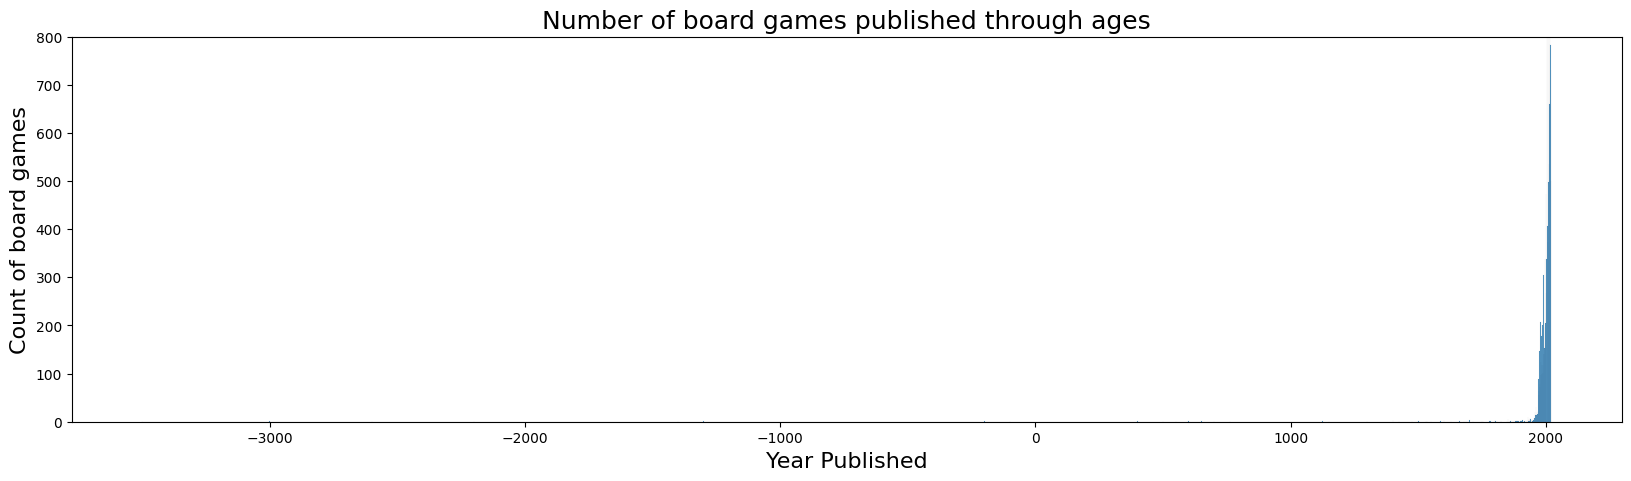

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))

sns.histplot(boardgame_clean['Year Published'])
plt.xlabel('Year Published', fontsize=16)
plt.ylabel('Count of board games', fontsize=16)
plt.title('Number of board games published through ages', fontsize=18)
plt.ylim(0, 800)

plt.show()

In the following graph, starting from 1950, we can observe the annual production of new board games. Notably, from around 1970, there is a substantial growth trend in the yearly creation of board games, accompanied by significant fluctuations among game producers. The more substantial leaps in production appear to occur approximately every three years.

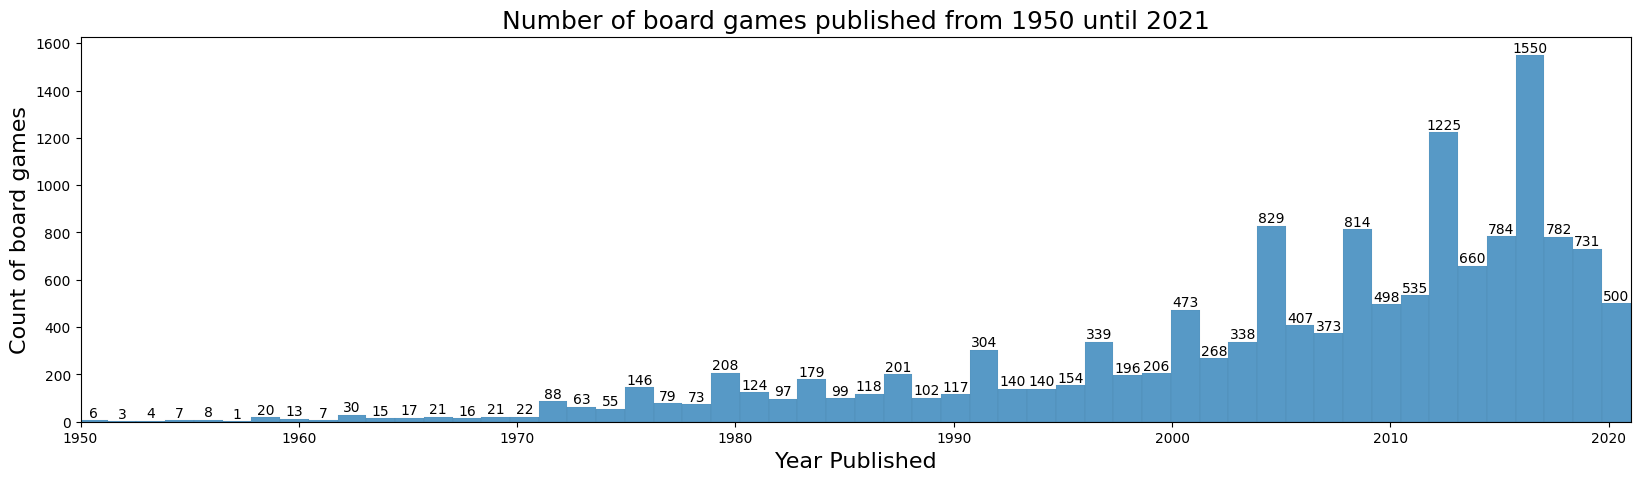

In [12]:
plt.figure(figsize=(20, 5))

ax = sns.histplot(boardgame_clean['Year Published'])
plt.xlabel('Year Published', fontsize=16)
plt.ylabel('Count of board games', fontsize=16)
plt.title('Number of board games published from 1950 until 2021', fontsize=18)
plt.xlim(1950, 2021)

# Create values on the top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Based on the correlation heatmap, we can observe the extent of correlation between various numeric columns.

The `ID` column, being the index column, can be disregarded. The `Complexity Average` column values show a moderately strong positive correlation with the `Min Age` (0.52) and `Rating Average` (0.50) columns, while a substantial negative correlation can be identified between the `Rating Average` and the `BGG Rank` columns. This indicates that the higher a game ranks on the BGG list (lower values), the higher its average rating tends to be. There is an exceptionally high correlation between `Owned Users` and `Users Rated`.

Text(0.5, 1.0, 'Correlation Heatmap')

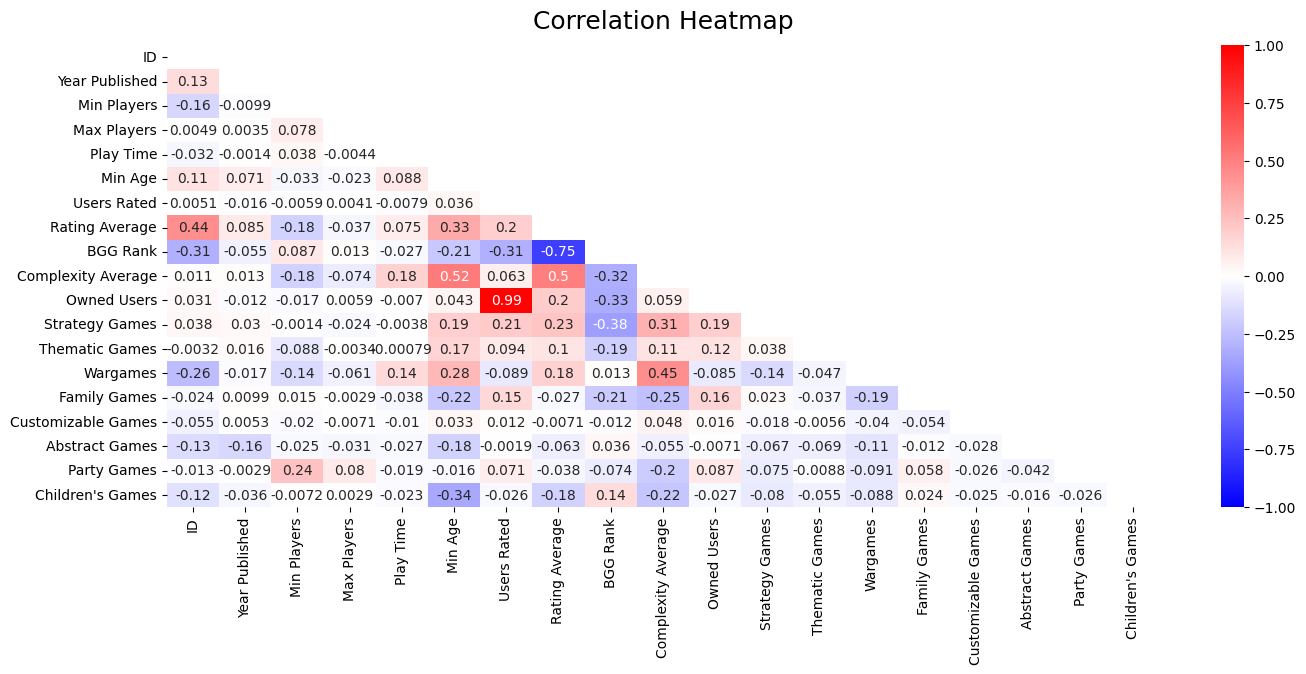

In [13]:
plt.figure(figsize=(16, 6))

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(boardgame_clean.corr(), dtype=np.bool))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(boardgame_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='bwr', mask=mask)

# Title and pad setting
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

To further understand these calculated correlations, they are visualized using scatterplot chart as follows.

The scatterplot representing the Rating Average against the BGG Rank reveals that, as we move up the ranking (towards lower values), the average ratings of board games tend to increase. Around the 16,000th rank, the Rating Average values are consistently above 5.5 on a 1-10 scale. Furthermore, it is noticeable that even in the middle section of the ranking, there are exceptional games with exceptionally high ratings of 9+.

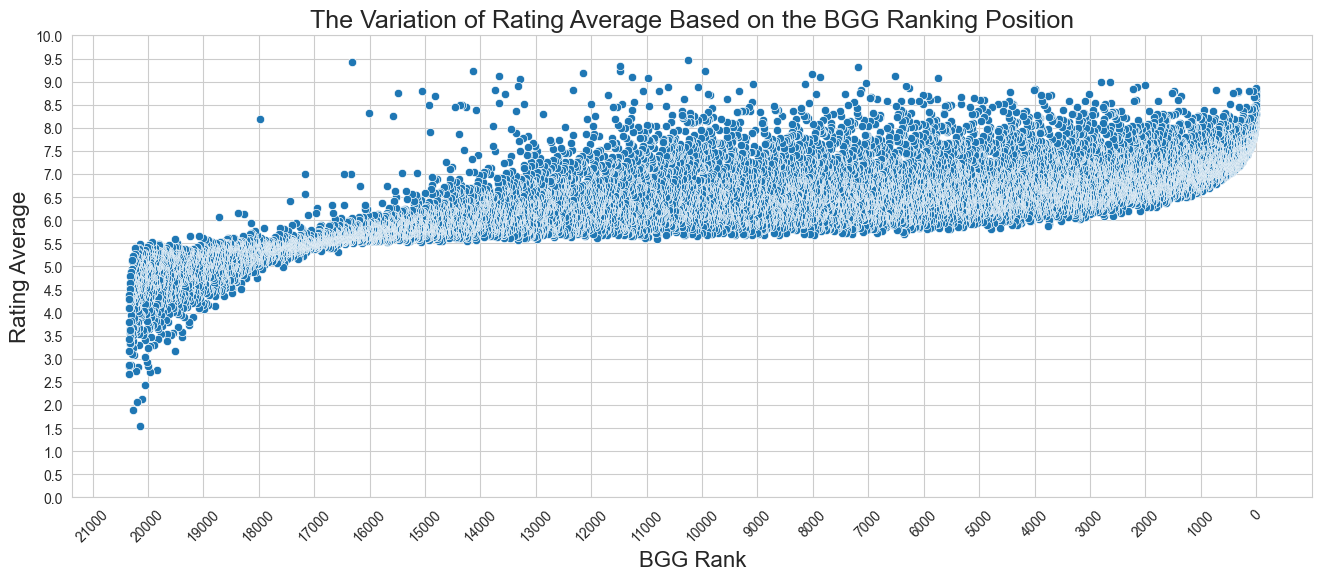

In [14]:
plt.figure(figsize=(16, 6))

sns.set_style("whitegrid")

sns.scatterplot(data=boardgame_clean, x='BGG Rank', y='Rating Average')

plt.xlabel('BGG Rank', fontsize=16)
plt.ylabel('Rating Average', fontsize=16)
plt.title('The Variation of Rating Average Based on the BGG Ranking Position', fontsize=18)
plt.ylim(0,10)
plt.yticks(np.arange(0,10.5,0.5))
plt.xticks(np.arange(0,22000,1000), rotation=45)

plt.gca().invert_xaxis()

plt.show()

A boxplot diagram is used to display the distribution of `Complexity Average` values for games recommended for different minimum age groups. It is apparent from the data that there is a substantial increase in average complexity from 8 years old to 12 years old. However, it's also worth noting that there are several outlier values in the higher range (+1.5 * Inter-Quartile Range). After the age of 12, the median values for complexity fluctuate, and their distribution increases.

The visualization of `Rating Average` against `Complexity Average` values suggests a general trend where more complex games tend to receive higher ratings. Nonetheless, there is also significant variability within this relationship.

The correlation between `Owned Users` and `Users Rated` is exceptionally strong at 0.99, which is evident in the scatterplot, illustrating that the more users a game has, the more ratings it tends to receive.

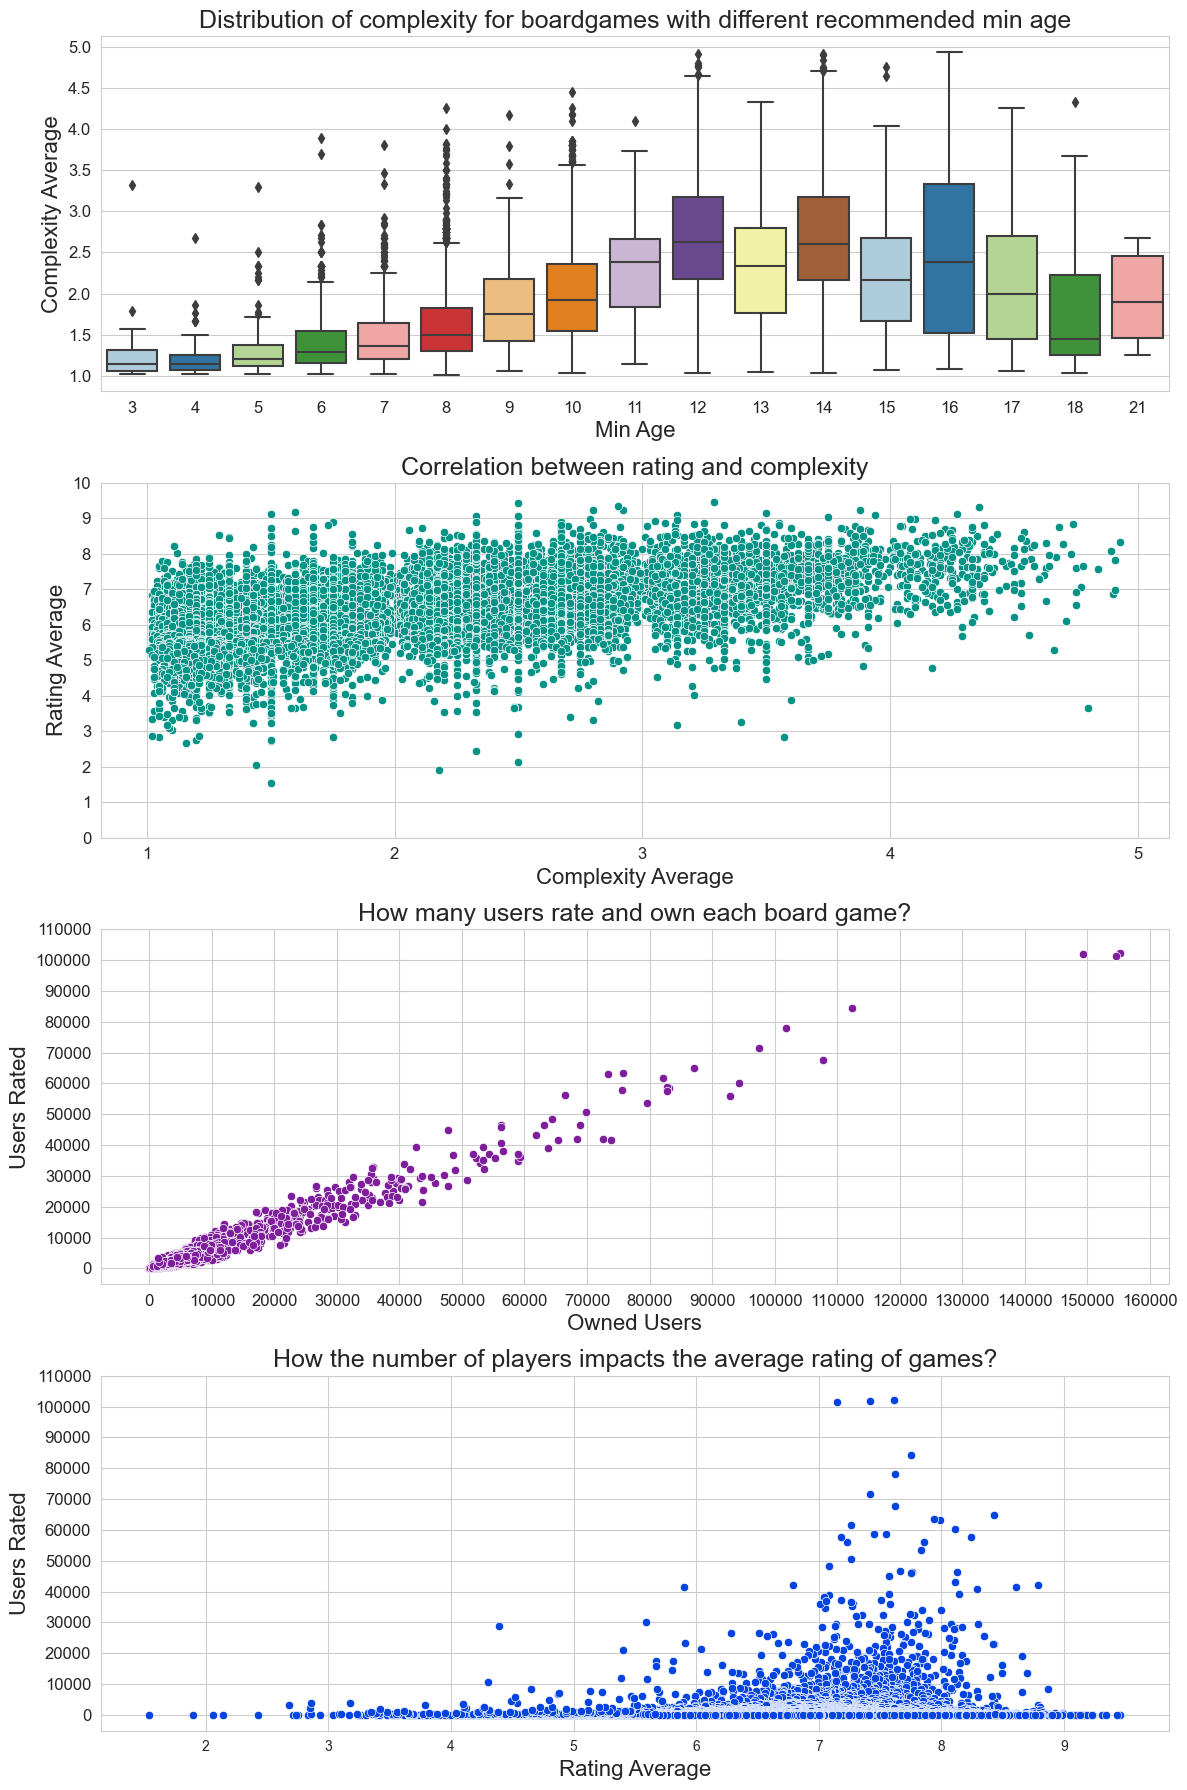

The correlation between number of players and the game's average rating: 0.19500638583101937


In [15]:
plt.figure(figsize=(12, 18))

# Scatterplot of Complexity Average vs Min Age
plt.subplot(4, 1, 1).tick_params(axis='both', which='major', labelsize=12)
sns.boxplot(data=boardgame_clean, y='Complexity Average', x='Min Age', palette='Paired')
plt.xlabel('Min Age', fontsize=16)
plt.ylabel('Complexity Average', fontsize=16)
plt.title('Distribution of complexity for boardgames with different recommended min age', fontsize=18)

# Scatterplot of Complexity Average vs Rating Average
plt.subplot(4, 1, 2)
sns.scatterplot(data=boardgame_clean, x='Complexity Average', y='Rating Average', color='#029386')
plt.yticks(np.arange(0,11,1), fontsize=12)
plt.xticks(np.arange(1,6,1), fontsize=12)
plt.xlabel('Complexity Average', fontsize=16)
plt.ylabel('Rating Average', fontsize=16)
plt.title('Correlation between rating and complexity', fontsize=18)

# Scatterplot of Complexity Average vs Rating Average
plt.subplot(4, 1, 3)
sns.scatterplot(data=boardgame_clean, x='Owned Users', y='Users Rated', color='#7E1E9C')
plt.xticks(np.arange(0,170000,10000), fontsize=12)
plt.yticks(np.arange(0,120000,10000), fontsize=12)
plt.xlabel('Owned Users', fontsize=16)
plt.ylabel('Users Rated', fontsize=16)
plt.title('How many users rate and own each board game?', fontsize=18)

# Scatterplot of Rating Average vs Users Rated
plt.subplot(4, 1, 4)
sns.scatterplot(data=boardgame_clean, x='Rating Average', y='Users Rated', color='#0343DF')
# plt.yticks(np.arange(0,170000,10000), fontsize=12)
# plt.xticks(np.arange(0,120000,10000), fontsize=12)
plt.xlabel('Rating Average', fontsize=16)
plt.ylabel('Users Rated', fontsize=16)
plt.yticks(np.arange(0,120000,10000), fontsize=12)
plt.title('How the number of players impacts the average rating of games?', fontsize=18)

plt.tight_layout()

plt.show()

# Calculating correlation
corr_users_rated_rating_average = boardgame_clean["Users Rated"].corr(boardgame_clean["Rating Average"])

# Print the correlation
print("The correlation between number of players and the game's average rating:",corr_users_rated_rating_average)

The number of players impacts the game's average rating, with week positive correlation. Most users tend to rate the board games between 6 and 8.5.

I have depicted the distribution of board games based on different `Min Age` recommendations in the following pie chart.

It can be observed that the proportion of board games significantly increases from the age of 8. The majority of games are well-suited for the age group of 10-12, while more complex or intricate games constitute only a small portion of the overall offering. 

For individuals aged 15 and above, the share of such games falls below 1% with each year recommendation.

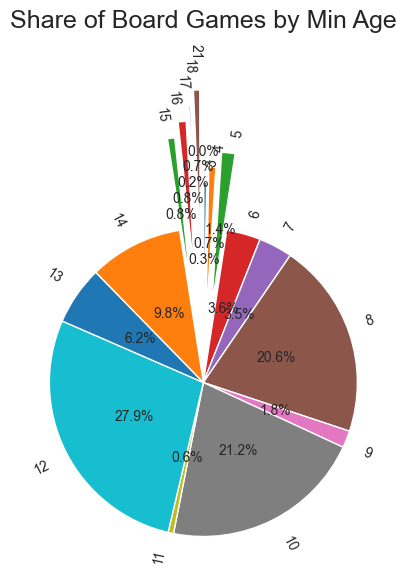

In [16]:
# Pivoting
count_year_age_pivot = pd.pivot_table(
    boardgame_clean[['Year Published', 'Min Age', 'ID']],
    index='Year Published',
    columns='Min Age',
    values='ID',
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='Total'
)

# Creating pie chart
explode = [0.3, 0.4, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6, 0.7, 0.8, 0.9, 1.0]

fig = plt.figure(figsize =(5, 5))
plt.pie(
    count_year_age_pivot.iloc[-1,0:-1],
    labels = count_year_age_pivot.iloc[-1,0:-1].index,
    counterclock = False,
    startangle = 90,
    autopct = '%1.1f%%',
    pctdistance = 0.5,
    labeldistance = 1.1,
    rotatelabels = True,
    explode = explode)

# Formatting the plot
plt.title('Share of Board Games by Min Age', size=18, y=1.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Upon examining the values in the `Domains` column, I observed that the frequency of categories is arranged in the following decreasing order.

_`Domains` column has a high number of missing values, dropping the rows with missing data would excessively truncate the dataset for analysis. Therefore, I choose to retain the rows with missing values. However, it is important to note during analysis that conclusions based on the `Domains` column are limited to the subset of the dataset._

In [17]:
domains_all = boardgame_clean["Domains"]

# Create a list from values separated by comma and trim spaces
domains_all_elements = domains_all.str.split(',').explode().str.strip().tolist() # unique() kivéve belőle

# The original list contains null/nan values, the following loop remove np.nan values
domains_all_elements = [x for x in domains_all_elements if x is not np.nan]

# Convert the list to a pandas Series
domains_all_elements = pd.Series(domains_all_elements)

# Calculate the value counts as a percentage
value_counts_percentage = domains_all_elements.value_counts() / len(boardgame_clean) * 100

# Format the results as percentage with % sign
value_counts_percentage.map("{:.2f}%".format)



Wargames              17.80%
Strategy Games        14.68%
Family Games          14.22%
Thematic Games         7.62%
Abstract Games         5.66%
Party Games            3.78%
Children's Games       3.57%
Customizable Games     1.71%
dtype: object

The most common categories in the `Domains` column are `Wargames` and `Strategy Games`. As someone with an interest in war and strategy, I wonder if games classified into these categories receive higher ratings from players?

To investigate this, let's examine how the `Rating Average` values evolve in the case of subset dataframes.

In [18]:
# Create sub dataframes with using interesting themes from domains (wargames and strategy games)
boardgame_wargames_only = boardgame_clean[(boardgame_clean['Wargames'] == 1) & 
                          (boardgame_clean['Strategy Games'] == 0) & 
                          (boardgame_clean['Thematic Games'] == 0) & 
                          (boardgame_clean['Family Games'] == 0) & 
                          (boardgame_clean['Customizable Games'] == 0) & 
                          (boardgame_clean['Abstract Games'] == 0) & 
                          (boardgame_clean['Party Games'] == 0) & 
                          (boardgame_clean["Children's Games"] == 0)]

boardgame_wargames_permitted = boardgame_clean[(boardgame_clean['Wargames'] == 1)]

boardgame_wargames_forbidden = boardgame_clean[(boardgame_clean['Wargames'] == 0)]

boardgame_strat_games_only = boardgame_clean[(boardgame_clean['Wargames'] == 0) & 
                          (boardgame_clean['Strategy Games'] == 1) & 
                          (boardgame_clean['Thematic Games'] == 0) & 
                          (boardgame_clean['Family Games'] == 0) & 
                          (boardgame_clean['Customizable Games'] == 0) & 
                          (boardgame_clean['Abstract Games'] == 0) & 
                          (boardgame_clean['Party Games'] == 0) & 
                          (boardgame_clean["Children's Games"] == 0)]

boardgame_strat_games_permitted = boardgame_clean[(boardgame_clean['Strategy Games'] == 1)]

boardgame_strat_games_forbidden = boardgame_clean[(boardgame_clean['Strategy Games'] == 0)]

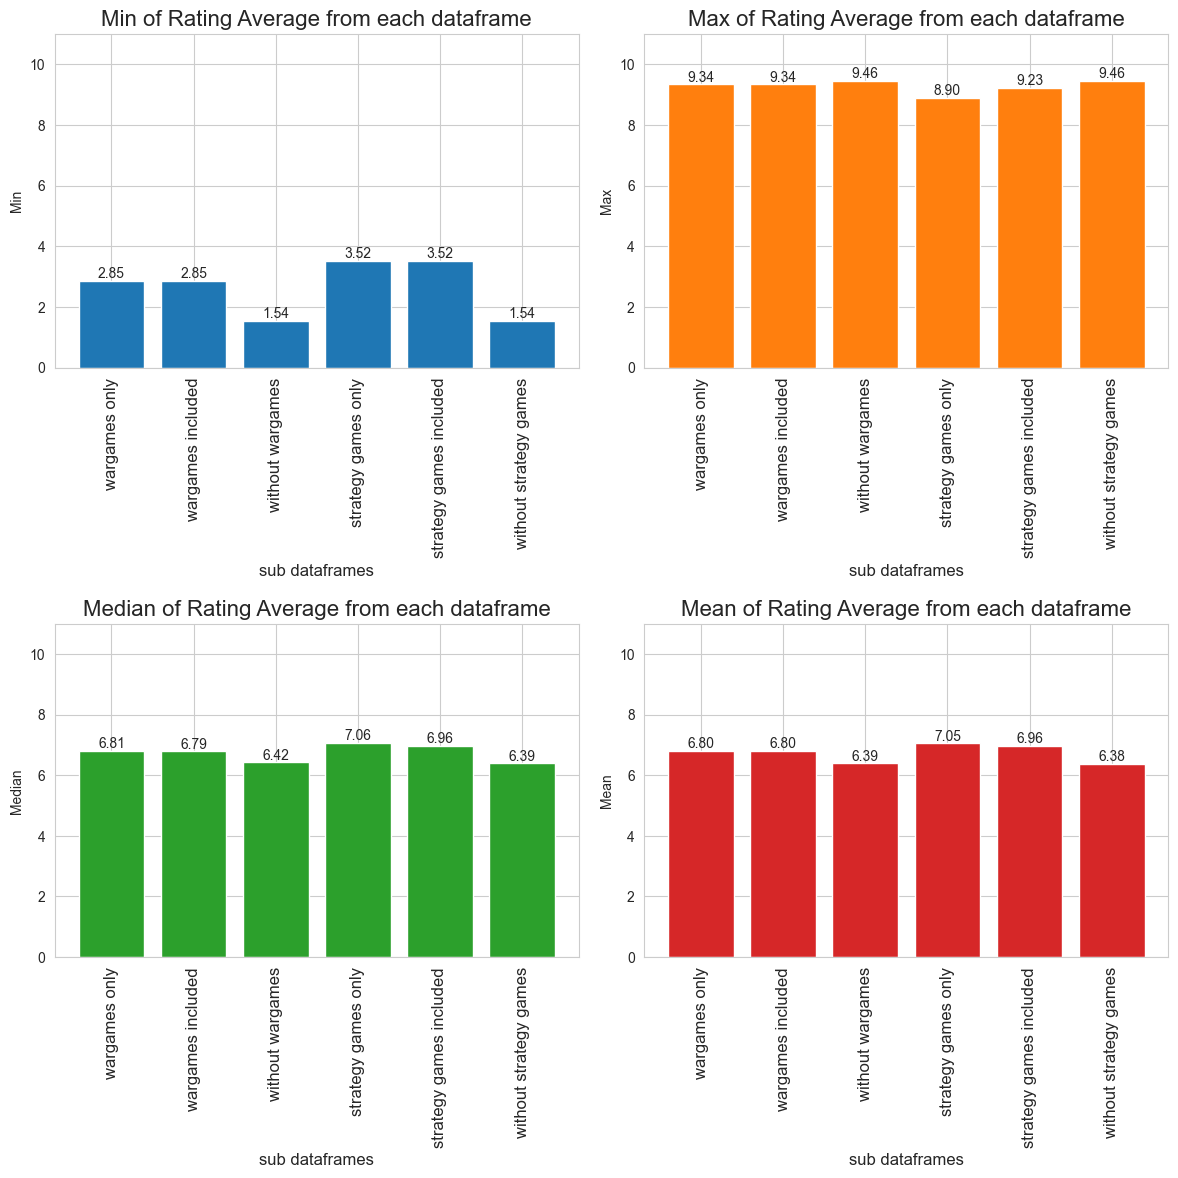

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# List of sub dataframes
sub_dataframes = [boardgame_wargames_only, boardgame_wargames_permitted, boardgame_wargames_forbidden, boardgame_strat_games_only, boardgame_strat_games_permitted, boardgame_strat_games_forbidden]

# Calculate min, max, median, mean for Rating Average column from each sub dataframe
rating_stats = []
for df in sub_dataframes:
    rating_stats.append({
        'Min': df['Rating Average'].min(),
        'Max': df['Rating Average'].max(),
        'Median': df['Rating Average'].median(),
        'Mean': df['Rating Average'].mean()
    })

labels = ['wargames only', 'wargames included', 'without wargames', 'strategy games only', 'strategy games included', 'without strategy games']
stats = ['Min', 'Max', 'Median', 'Mean']

# Define the tab10 qualitative colormap
cmap = cm.get_cmap('tab10')

# Create 2X2 subplots and set the size of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, stat in enumerate(stats):
    values = [rating_stat[stat] for rating_stat in rating_stats]
    ax = axes[i // 2, i % 2]
    ax.bar(labels, values, color=cmap(i))
    ax.set_xlabel('sub dataframes', fontsize=12)
    ax.set_ylabel(stat, fontsize=10)
    ax.set_title(f'{stat} of Rating Average from each dataframe', fontsize=16)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)

    # Set the values of labels on top of each bars
    for j, value in enumerate(values):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    ax.set_ylim(0, 11)

# Set layout parameter
plt.tight_layout(pad=1.5)
plt.show()

Based on the bar charts, it is evident that the **minimum values** of games classified as `Wargames` and `Strategy Games` lag behind others. Additionally, their **median** and **mean** values are slightly lower compared to other games.

From these findings, it can be inferred that players generally rate `Wargames` and `Strategy Games` more favorably.

## Recommendation for a game night

1. As a fan of strategy and war games, I would definitely recommend games that have at least these two values in the `Domains` column.
2. For a comfortable setup and enjoyable play, it is essential to consider games with playing a rather small group, that's why I set the minimum players as 2 and maximum of players as 5.
3. I prefer games that can be played within one evening, so let's cap the game duration at 300 minutes.
4. In the decision-making process for board games, player ratings can be insightful. Therefore, I'll arrange the results in descending order based on the `Rating Average` column.

The resulting table with TOP10 recommended games is displayed below:

In [20]:
boardgame_recommendation = boardgame_clean[
    (boardgame_clean['Wargames'] == 1) &
    (boardgame_clean['Strategy Games'] == 1) &
    (boardgame_clean['Min Players'] >= 2) &
    (boardgame_clean['Max Players'] <= 5) &
    (boardgame_clean['Play Time'] <= 300)
]

boardgame_recommendation.sort_values(by="Rating Average", ascending=False).head(10)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains,Strategy Games,Thematic Games,Wargames,Family Games,Customizable Games,Abstract Games,Party Games,Children's Games
939,206480,Imperial Struggle,2020,2,2,240,12,1002,8.38,940,3.87,3006,"Area Majority / Influence, Campaign / Battle C...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
4475,250664,Godtear,2019,2,2,120,14,212,8.33,4477,2.80,442,"Area Majority / Influence, Grid Movement, Once...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
9,12333,Twilight Struggle,2005,2,2,180,13,40814,8.29,10,3.59,56219,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
1836,194517,Super Fantasy Brawl,2020,2,4,40,14,620,8.24,1837,2.17,1312,"Area Majority / Influence, Area Movement, Grid...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
26,237182,Root,2018,2,4,90,10,24412,8.10,27,3.67,37715,"Action Queue, Action Retrieval, Area Majority ...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
11967,140995,Colonial Space Wars: New Horizons,2013,2,4,30,7,39,7.81,11969,2.40,76,"Action Points, Point to Point Movement","Strategy Games, Wargames",1,0,1,0,0,0,0,0
9542,122236,Conflict of Alliances: Warring States,2011,2,2,60,10,62,7.80,9544,2.52,56,"Area-Impulse, Campaign / Battle Card Driven, S...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
601,26997,1989: Dawn of Freedom,2012,2,2,150,12,2043,7.79,602,3.30,3864,"Area Majority / Influence, Campaign / Battle C...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
887,164949,"Time of Crisis: The Roman Empire in Turmoil, 2...",2017,2,4,180,14,1656,7.66,888,2.94,2771,"Action Points, Area Movement, Campaign / Battl...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
756,69779,Polis: Fight for the Hegemony,2012,2,2,120,12,2106,7.62,757,3.69,3209,"Area Majority / Influence, Area Movement, Dice...","Strategy Games, Wargames",1,0,1,0,0,0,0,0
